In [28]:
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

import network
import numpy as np
from scipy import stats
#from numba import jit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Aufgabe 6
Bestimmung der fraktalen Dimension des perkolierenden Clusters für $p\rightarrow p_c \;,\; p > p_c$.
Das ist die Änderung des Gewichts $P_L(p)$ des perkolierenden Clusters mit linearer Zunahme von $L$.
$$\frac{\partial P_L(p)}{\partial L}$$

In [29]:
#@jit()
def get_relative_size_of_largest_percolating_cluster(net: network.Network):
    return net.N[net.get_largest_percolating_cluster()] / net.get_total_occupied_spots()

#@jit()
def calc_pl():
    pc = 0.595
    dL = 20
    L = np.arange(200, 5001, dL)
    pl = np.zeros(L.shape)
    for i in range(L.size):
        pl1 = np.zeros(10)
        for j in range(10):
            n = network.create_percolating(L[i], pc)
            pl1[j] = get_relative_size_of_largest_percolating_cluster(n)
        pl[i] = np.average(pl1)
    return L, pl, dL       

L, pl, dL = calc_pl()


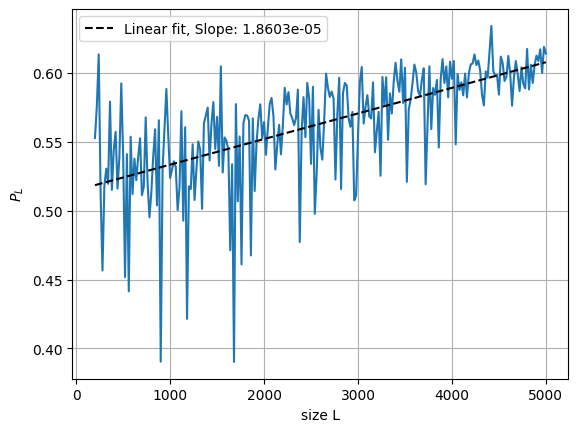

In [27]:
l = stats.linregress(L, pl)
x = np.array([L[0], L[-1]])
fig, ax = plt.subplots()
ax.plot(L, pl)
ax.plot(x, x*l.slope + l.intercept, 'k--', label=f'Linear fit, Slope: {round(l.slope, 10)}')
ax.set_xlabel('size L')
ax.set_ylabel('$P_L$')
plt.legend()
plt.grid()

Damit währe die fraktale Dimension $D=1,836\cdot 10^{-5}$